In [80]:
## Banking Customer Selection

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
customers_df = pd.read_csv('C:/Users/User/Documents/Banking_Customer_Dashboard/C8_Input Files/Customers.csv')
facts_df = pd.read_csv('C:/Users/User/Documents/Banking_Customer_Dashboard/C8_Input Files/Facts.csv')


In [82]:
## uploading customers dataframe

customers_df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [83]:
## uploading facts dataframe

facts_df.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [105]:
## Joined data frames on right union

merged_df = customers_df.merge(facts_df, on='customer_id', how='right')
merged_df.head(10)

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1371,35-45,Chennai,Salaried IT Employees,Male,Married,64696,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,25-34,Delhi NCR,Salaried Other Employees,Male,Married,39893,October,Groceries,Credit Card,1466
2,ATQCUS0595,25-34,Bengaluru,Government Employees,Male,Married,52001,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,25-34,Chennai,Salaried Other Employees,Male,Married,40243,October,Electronics,Credit Card,1137
4,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Bills,UPI,2102
5,ATQCUS1972,45+,Hyderabad,Salaried Other Employees,Male,Married,48647,October,Health & Wellness,UPI,243
6,ATQCUS2843,35-45,Chennai,Salaried Other Employees,Female,Married,43283,June,Entertainment,Credit Card,268
7,ATQCUS2634,35-45,Delhi NCR,Salaried IT Employees,Female,Married,61583,August,Apparel,Debit Card,737
8,ATQCUS2165,25-34,Mumbai,Freelancers,Female,Married,35648,July,Food,UPI,506
9,ATQCUS0908,35-45,Mumbai,Salaried IT Employees,Male,Married,67776,September,Others,UPI,380


In [85]:
grouped_df = facts_df.groupby('customer_id')['spend'].sum() 
df2 =pd.DataFrame(grouped_df)
df2.head()

,spend
customer_id,
ATQCUS0001,170545
ATQCUS0002,168514
ATQCUS0003,157534
ATQCUS0004,162655
ATQCUS0005,157296


In [86]:
grouped_df2 = facts_df.groupby('customer_id')['spend'].sum()
grouped_df2.head()

customer_id
ATQCUS0001    170545
ATQCUS0002    168514
ATQCUS0003    157534
ATQCUS0004    162655
ATQCUS0005    157296
Name: spend, dtype: int64

In [87]:
## checking for grouped avg income, the data organzors changed the data types so I wanted to check long ways to insure accuracy

grouped_df2 = customers_df.groupby('customer_id')['avg_income'].sum() 
df3 =pd.DataFrame(grouped_df2)
df3.head()

,avg_income
customer_id,
ATQCUS0001,49767
ATQCUS0002,47336
ATQCUS0003,48851
ATQCUS0004,45425
ATQCUS0005,46732


In [88]:
mdf = df2.merge(df3 , on='customer_id', how='left')
mdf.head()

,spend,avg_income
customer_id,,
ATQCUS0001,170545,49767
ATQCUS0002,168514,47336
ATQCUS0003,157534,48851
ATQCUS0004,162655,45425
ATQCUS0005,157296,46732


In [91]:
## merging new dataframe of groupbyed data to old dataframe


df11 = merged_df.merge(mdf, on='customer_id', how='left')
df11

,customer_id,age_group,city,occupation,gender,marital status,avg_income_x,month,category,payment_type,spend_x,spend_y,avg_income_y
0,ATQCUS1371,35-45,Chennai,Salaried IT Employees,Male,Married,64696,July,Health & Wellness,Credit Card,1114,146804,64696
1,ATQCUS0368,25-34,Delhi NCR,Salaried Other Employees,Male,Married,39893,October,Groceries,Credit Card,1466,122049,39893
2,ATQCUS0595,25-34,Bengaluru,Government Employees,Male,Married,52001,May,Health & Wellness,Credit Card,387,97203,52001
3,ATQCUS0667,25-34,Chennai,Salaried Other Employees,Male,Married,40243,October,Electronics,Credit Card,1137,80213,40243
4,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Bills,UPI,2102,189400,73541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS1993,45+,Hyderabad,Freelancers,Male,Married,38310,June,Bills,Debit Card,897,82141,38310
863996,ATQCUS1063,35-45,Mumbai,Government Employees,Male,Married,52731,September,Bills,Credit Card,2680,128632,52731
863997,ATQCUS0416,25-34,Delhi NCR,Business Owners,Male,Married,71488,August,Others,Credit Card,270,157528,71488
863998,ATQCUS3361,21-24,Chennai,Salaried IT Employees,Male,Single,50593,September,Bills,UPI,446,105880,50593


In [97]:
##creating Income utilization 

df11['Income Utilisation %'] = df11['spend_y'] / (df11['avg_income_y']* 6) * 100
df11.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income_x,month,category,payment_type,spend_x,spend_y,avg_income_y,Income Utilisation %
0,ATQCUS1371,35-45,Chennai,Salaried IT Employees,Male,Married,64696,July,Health & Wellness,Credit Card,1114,146804,64696,37.818927
1,ATQCUS0368,25-34,Delhi NCR,Salaried Other Employees,Male,Married,39893,October,Groceries,Credit Card,1466,122049,39893,50.990149
2,ATQCUS0595,25-34,Bengaluru,Government Employees,Male,Married,52001,May,Health & Wellness,Credit Card,387,97203,52001,31.154209
3,ATQCUS0667,25-34,Chennai,Salaried Other Employees,Male,Married,40243,October,Electronics,Credit Card,1137,80213,40243,33.220270
4,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Bills,UPI,2102,189400,73541,42.923902


In [122]:
mdf['Income_U'] = mdf['spend']/6/mdf['avg_income']*100
mdf = mdf.reset_index()
mdf.head()

,customer_id,spend,avg_income,Income_U
0,ATQCUS0001,170545,49767,57.114487
1,ATQCUS0002,168514,47336,59.332573
2,ATQCUS0003,157534,48851,53.746426
3,ATQCUS0004,162655,45425,59.678958
4,ATQCUS0005,157296,46732,56.098605


In [124]:
## stats about income U

mdf.describe()

,spend,avg_income,Income_U
count,4000.000000,4000.000000,4000.000000
mean,132724.438750,51657.032250,42.948018
std,54988.167095,14690.140645,12.313390
min,35265.000000,24816.000000,14.290724
25%,90933.750000,38701.000000,33.602902
50%,120392.500000,50422.000000,41.899808
75%,163112.500000,64773.250000,51.651985
max,315201.000000,86600.000000,77.374984


In [139]:
grouped_df = facts_df.groupby('customer_id')['spend'].sum() 
df2 =pd.DataFrame(grouped_df)

grouped_df2 = customers_df.groupby(['customer_id','gender','age_group','city','occupation','marital status'])['avg_income'].sum() 
df3 =pd.DataFrame(grouped_df2)

df3 = df3.reset_index()
mdf4 = df2.merge(df3 , on='customer_id', how='right')

mdf4['Income_U'] = mdf4['spend']/6/mdf4['avg_income']*100
mdf4 = mdf4.reset_index()
mdf4.head()

,index,customer_id,spend,gender,age_group,city,occupation,marital status,avg_income,Income_U
0,0,ATQCUS0001,170545,Male,21-24,Mumbai,Salaried IT Employees,Married,49767,57.114487
1,1,ATQCUS0002,168514,Male,21-24,Mumbai,Salaried IT Employees,Married,47336,59.332573
2,2,ATQCUS0003,157534,Male,21-24,Mumbai,Salaried IT Employees,Married,48851,53.746426
3,3,ATQCUS0004,162655,Male,21-24,Mumbai,Salaried IT Employees,Married,45425,59.678958
4,4,ATQCUS0005,157296,Male,21-24,Mumbai,Salaried IT Employees,Married,46732,56.098605


In [147]:
bob = mdf4.groupby('city').sum()
bob['Income_U'] = bob['spend']/6/bob['avg_income']*100
bob = bob.reset_index()
bob

C:\Users\User\AppData\Local\Temp\ipykernel_16424\2452444183.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bob = mdf4.groupby('city').sum()


,city,index,spend,avg_income,Income_U
0,Bengaluru,1523635,100018029,38356019,43.460380
1,Chennai,1717830,79871509,42802041,31.101129
2,Delhi NCR,1421586,111449559,38675099,48.028129
3,Hyderabad,1261686,67520175,31040471,36.253839
4,Mumbai,2073263,172038483,55754499,51.427384


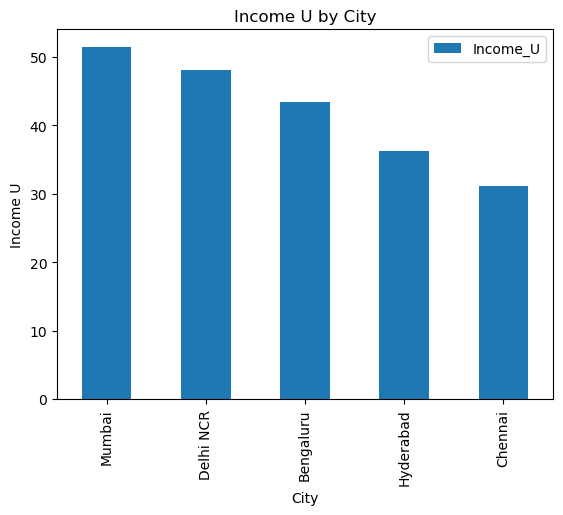

In [152]:
bob2 = bob.sort_values(by='Income_U', ascending=False)
bob2.plot.bar(x='city', y='Income_U')
plt.title('Income U by City')
plt.xlabel('City')
plt.ylabel('Income U')
plt.show()


In [153]:
bob = mdf4.groupby('gender').sum()
bob['Income_U'] = bob['spend']/6/bob['avg_income']*100
bob = bob.reset_index()
bob

C:\Users\User\AppData\Local\Temp\ipykernel_16424\2688918432.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bob = mdf4.groupby('gender').sum()


,gender,index,spend,avg_income,Income_U
0,Female,3948902,173759718,72536119,39.924872
1,Male,4049098,357138037,134092010,44.389674


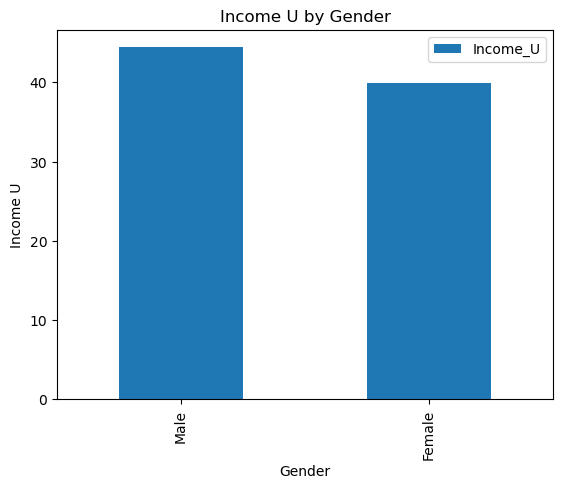

In [154]:

bob2 = bob.sort_values(by='Income_U', ascending=False)
bob2.plot.bar(x='gender', y='Income_U')
plt.title('Income U by Gender')
plt.xlabel('Gender')
plt.ylabel('Income U')
plt.show()

In [155]:
## groupby occuption spending etc

bob = mdf4.groupby('occupation').sum()
bob['Income_U'] = bob['spend']/6/bob['avg_income']*100
bob = bob.reset_index()
bob

C:\Users\User\AppData\Local\Temp\ipykernel_16424\495794811.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bob = mdf4.groupby('occupation').sum()


,occupation,index,spend,avg_income,Income_U
0,Business Owners,1146009,88004709,44157443,33.216261
1,Freelancers,1489407,75538638,27485671,45.804860
2,Government Employees,796171,36122418,20761899,28.997362
3,Salaried IT Employees,2725790,243720304,79580577,51.042669
4,Salaried Other Employees,1840623,87511686,34642539,42.102229


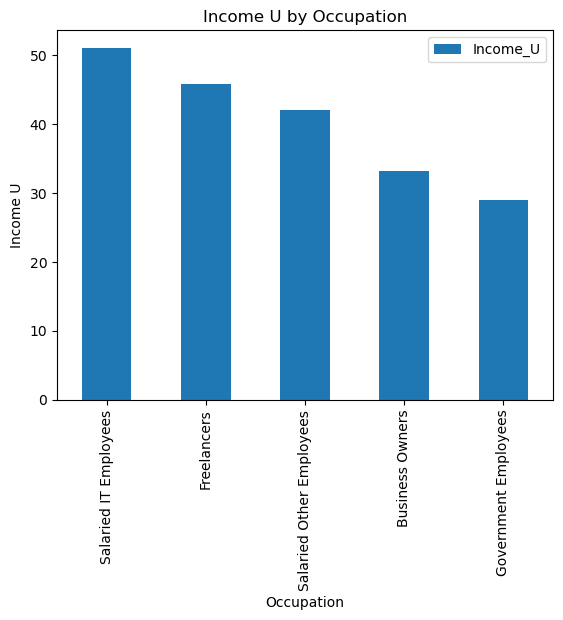

In [157]:
bob2 = bob.sort_values(by='Income_U', ascending=False)
bob2.plot.bar(x='occupation', y='Income_U')
plt.title('Income U by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Income U')
plt.show()

In [158]:
bob = mdf4.groupby('marital status').sum()
bob['Income_U'] = bob['spend']/6/bob['avg_income']*100
bob = bob.reset_index()
bob

C:\Users\User\AppData\Local\Temp\ipykernel_16424\4110046583.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bob = mdf4.groupby('marital status').sum()


,marital status,index,spend,avg_income,Income_U
0,Married,4915680,429029573,167200590,42.765955
1,Single,3082320,101868182,39427539,43.061349


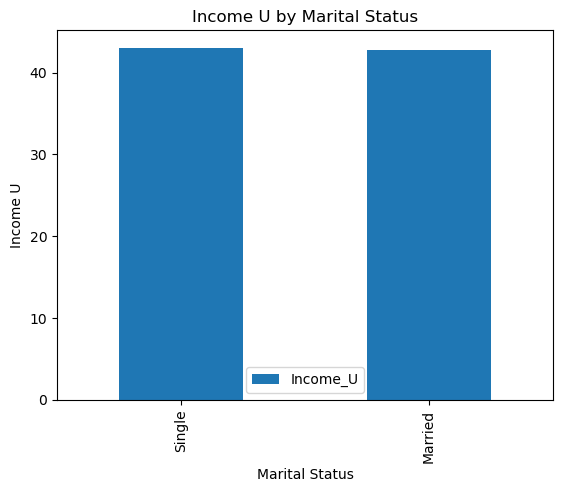

In [160]:
bob2 = bob.sort_values(by='marital status', ascending=False)
bob2.plot.bar(x='marital status', y='Income_U')
plt.title('Income U by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income U')
plt.show()

In [163]:
bob = mdf4.groupby('age_group').sum()
bob['Income_U'] = bob['spend']/6/bob['avg_income']*100
bob = bob.reset_index()
bob

C:\Users\User\AppData\Local\Temp\ipykernel_16424\2430947078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bob = mdf4.groupby('age_group').sum()


,age_group,index,spend,avg_income,Income_U
0,21-24,1874145,68523077,28136326,40.589922
1,25-34,2465575,203357184,77636972,43.655572
2,35-45,2442011,190639828,68011240,46.717726
3,45+,1216269,68377666,32843591,34.698635


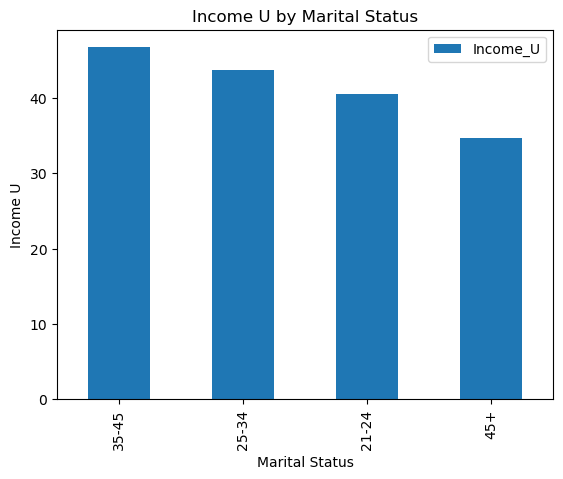

In [167]:
bob2 = bob.sort_values(by='Income_U', ascending=False)
bob2.plot.bar(x='age_group', y='Income_U')
plt.title('Income U by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income U')
plt.show()

In [180]:
grouped_df = facts_df.groupby(['customer_id','payment_type'])['spend'].sum() 
df20 =pd.DataFrame(grouped_df)

grouped_df20 = customers_df.groupby('customer_id')['avg_income'].sum() 
df30 =pd.DataFrame(grouped_df20)

df30 = df30.reset_index()
mdf5 = df20.merge(df30 , on='customer_id', how='left')

mdf5['Income_U'] = mdf5['spend']/6/mdf5['avg_income']*100
mdf5 = mdf5.reset_index()
mdf5.head()

,index,customer_id,spend,avg_income,Income_U
0,0,ATQCUS0001,58680,49767,19.651576
1,1,ATQCUS0001,35833,49767,12.000255
2,2,ATQCUS0001,15799,49767,5.290989
3,3,ATQCUS0001,60233,49767,20.171667
4,4,ATQCUS0002,58054,47336,20.440398


In [190]:
grouped_df = facts_df.groupby(['customer_id','payment_type'])['spend'].sum() 
df2 =pd.DataFrame(grouped_df)

grouped_df2 = customers_df.groupby('customer_id')['avg_income'].sum() 
df3 =pd.DataFrame(grouped_df2)

#df3 = df3.reset_index()
mdf4 = df2.merge(df3 , on='customer_id', how='right')

mdf4['Income_U'] = mdf4['spend']/6/mdf4['avg_income']*100
#mdf4 = mdf4.reset_index()
mdf4.head()

,spend,avg_income,Income_U
customer_id,,,
ATQCUS0001,58680,49767,19.651576
ATQCUS0001,35833,49767,12.000255
ATQCUS0001,15799,49767,5.290989
ATQCUS0001,60233,49767,20.171667
ATQCUS0002,58054,47336,20.440398


In [223]:
grouped_df = facts_df.groupby('payment_type')['spend'].sum()
df2 = df2.reset_index()
df2 =pd.DataFrame(grouped_df)
df2 = df2.reset_index()
df2

,payment_type,spend
0,Credit Card,216308873
1,Debit Card,119557229
2,Net Banking,54208430
3,UPI,140823223


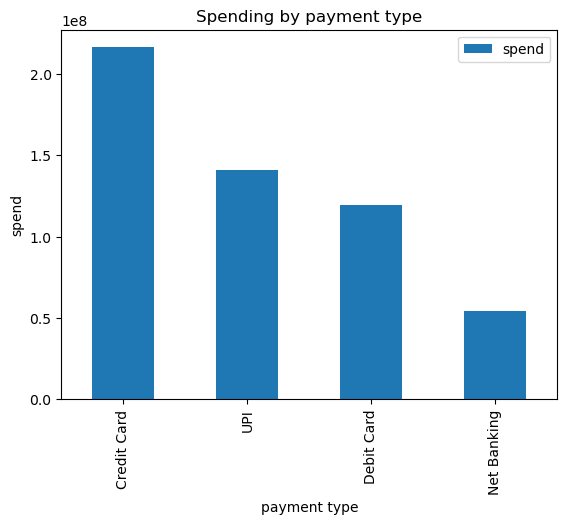

In [225]:
bob2 = df2.sort_values(by='spend', ascending=False)
bob2.plot.bar(x='payment_type', y='spend')
plt.title('Spending by payment type')
plt.xlabel('payment type')
plt.ylabel('spend')
plt.show()

In [218]:
grouped_df = facts_df.groupby('month')['spend'].sum()
df2 =pd.DataFrame(grouped_df)
df2 = df2.reset_index()
df2

,month,spend
0,August,100859350
1,July,80624751
2,June,79318104
3,May,68139836
4,October,86026137
5,September,115929577


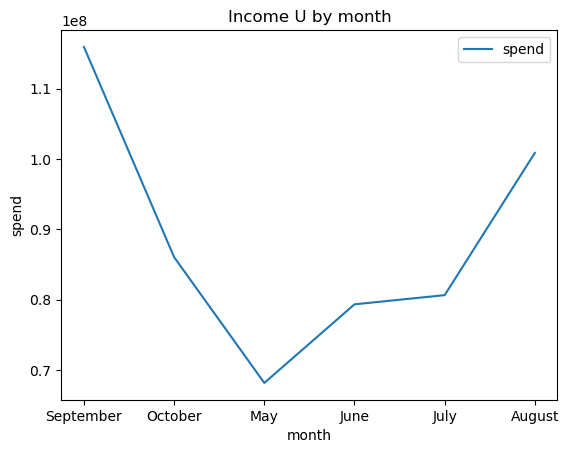

In [220]:
bob2 = df2.sort_values(by='month', ascending=False)
bob2.plot.line(x='month', y='spend')
plt.title('Income U by month')
plt.xlabel('month')
plt.ylabel('spend')
plt.show()

In [227]:
grouped_df = facts_df.groupby('category')['spend'].sum()
df2 =pd.DataFrame(grouped_df)
df2 = df2.reset_index()
df2


,category,spend
0,Apparel,34036001
1,Bills,104912768
2,Electronics,79562220
3,Entertainment,41289162
4,Food,44013470
5,Groceries,86303761
6,Health & Wellness,65599867
7,Others,15957182
8,Travel,59223324


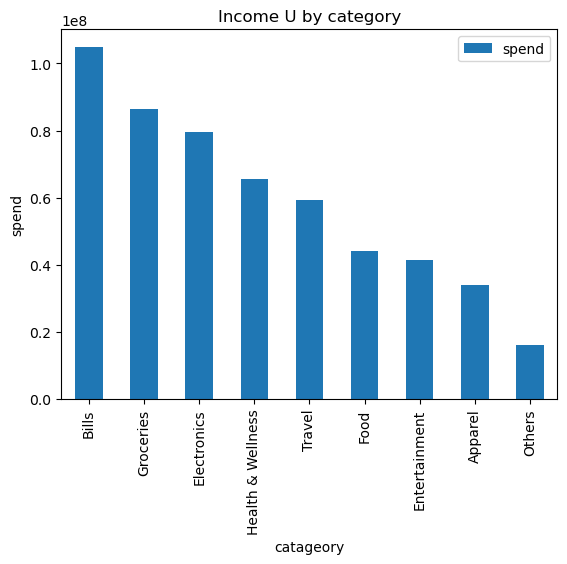

In [238]:
bob2 = df2.sort_values(by='spend', ascending=False)
bob2.plot.bar(x='category', y='spend')
plt.title('Income U by category')
plt.xlabel('catageory')
plt.ylabel('spend')
plt.show()